In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Dataset'i yükleme
data = pd.read_csv('diabetes_dataset.csv')

print("İlk 5 satır:")
print(data.head())

# Özellik ve hedef değişkeni ayırma
X = data.iloc[:, :-1]  # Son sütun (Outcome) hariç tüm özellikler
y = data['Outcome']

# Normalizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Veri seti boyutlarını gözlemleme
print(f"Eğitim seti boyutu: {X_train.shape}, Test seti boyutu: {X_test.shape}")


İlk 5 satır:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Eğitim seti boyutu: (614, 8), Test seti boyutu: (154, 8)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# MLP modelini tanımlama
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # İlk gizli katman (16 nöron, ReLU)
    Dense(8, activation='relu'),  # İkinci gizli katman (8 nöron, ReLU)
    Dense(1, activation='sigmoid')  # Çıkış katmanı (1 nöron, Sigmoid)
])

# Modelin derlenmesi
model.compile(optimizer=Adam(learning_rate=0.001),  # Optimizasyon algoritması
              loss='binary_crossentropy',          # Kayıp fonksiyonu
              metrics=['accuracy'])                # Performans ölçütü

# Modelin özeti
print(model.summary())

# Modelin eğitimi
history = model.fit(X_train, y_train,
                    validation_split=0.2,  # Eğitim setinin %20'sini doğrulama için kullan
                    epochs=20,             # Eğitim için 50 iterasyon
                    batch_size=32,         # Her iterasyonda kullanılacak veri sayısı
                    verbose=1)             # Eğitim detaylarını göster

# Test setinde değerlendirme
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Tahminler (0 veya 1'e yuvarlanmış)
print("\nTest Sonuçları:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6087 - loss: 0.6992 - val_accuracy: 0.7073 - val_loss: 0.6581
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - loss: 0.6700 - val_accuracy: 0.7317 - val_loss: 0.6502
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - loss: 0.6541 - val_accuracy: 0.7480 - val_loss: 0.6446
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - loss: 0.6515 - val_accuracy: 0.7236 - val_loss: 0.6389
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7037 - loss: 0.6184 - val_accuracy: 0.7317 - val_loss: 0.6318
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7227 - loss: 0.5984 - val_accuracy: 0.7154 - val_loss: 0.6237
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7218 - loss: 0.5922 - val_accuracy: 0.7154 - val_loss: 0.6184
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.5848 - val_accuracy: 0.7154 - val_

In [31]:
!pip install tensorflow


  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (21 kB)
  Using cached namex-0.0.9-py3-none-any.whl.me

In [27]:
import numpy as np

# Örnek bir veri: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
# Örnek değerler: 1 hamilelik, 120 glukoz, 70 tansiyon, 10 cilt kalınlığı, 80 insülin, 26.84 BMI, 0.5 soy geçmiş fonksiyonu, 35 yaş
new_data = np.array([[2, 120, 60, 10, 80, 26.84, 0.5, 35]])

# Veriyi aynı ölçekleme işlemine tabi tutalım
new_data_scaled = scaler.transform(new_data)

# Modelden tahmin alalım
prediction = model.predict(new_data_scaled)

# Sonuçları yorumlayalım
print(f"Tahmin edilen olasılık: {prediction[0][0]:.2f}")
if prediction[0][0] > 0.5:
    print("Bu kişi diyabet hastası olabilir (1).")
else:
    print("Bu kişi diyabet hastası olmayabilir (0).")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Tahmin edilen olasılık: 0.21
Bu kişi diyabet hastası olmayabilir (0).


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


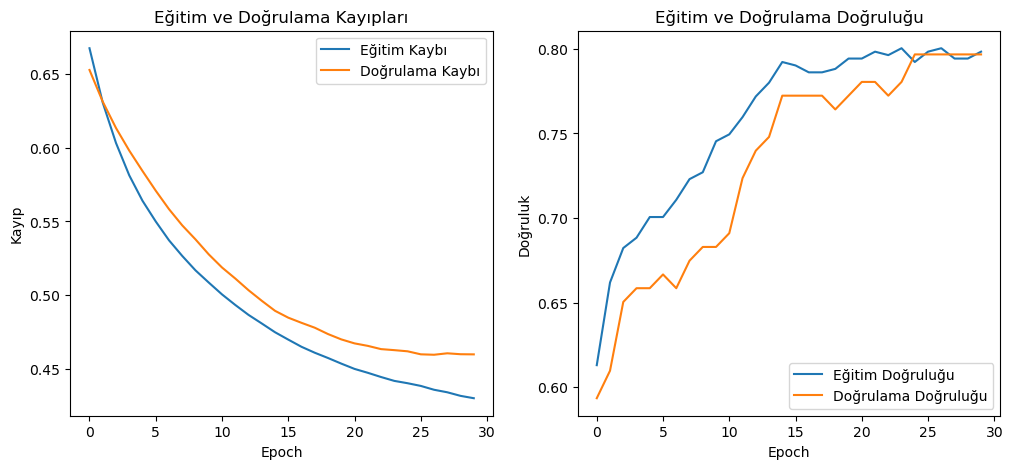

In [29]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıplarını çizdirme
plt.figure(figsize=(12, 5))

# Eğitim ve doğrulama kayıpları
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()


In [96]:
# Model eğitildikten sonra:
model.save('mlp_model.h5')

import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [100]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Flask uygulaması başlatılıyor
app = Flask(__name__)

# Model ve scaler'ı yükleyin (aynı klasörde bulunmalı)
model = load_model('mlp_model.h5')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)
        input_data = np.array([[
            data['pregnancies'],
            data['glucose'],
            data['bloodPressure'],
            data['skinThickness'],
            data['insulin'],
            data['bmi'],
            data['diabetesPedigreeFunction'],
            data['age']
        ]])
    except Exception as e:
        return jsonify({
            "error": "Geçersiz girdi formatı",
            "details": str(e)
        }), 400

    # Ölçekleme ve tahmin işlemi
    input_data_scaled = scaler.transform(input_data)
    prediction_prob = model.predict(input_data_scaled)[0][0]
    prediction = int(prediction_prob > 0.5)

    return jsonify({
        "prediction": prediction,
        "probability": float(prediction_prob)
    })

# Flask uygulamasını başlat (localhost yerine tüm IP'lere açık olacak şekilde)
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5001, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://192.168.200.237:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[86 13]
 [25 30]]


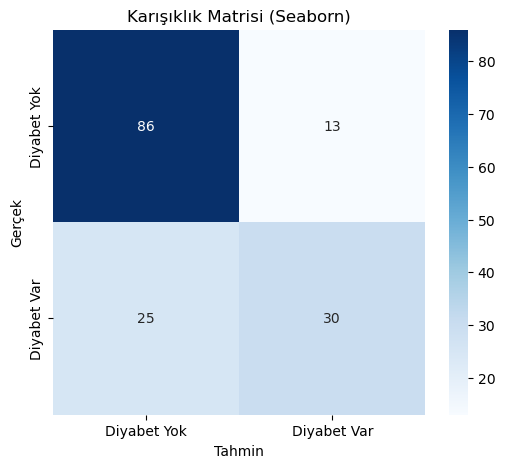

In [41]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Diyabet Yok", "Diyabet Var"], yticklabels=["Diyabet Yok", "Diyabet Var"])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi (Seaborn)')
plt.show()
